In [7]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/linkedin-job-postings/postings.csv
/kaggle/input/linkedin-job-postings/companies/companies.csv
/kaggle/input/linkedin-job-postings/companies/company_industries.csv
/kaggle/input/linkedin-job-postings/companies/company_specialities.csv
/kaggle/input/linkedin-job-postings/companies/employee_counts.csv
/kaggle/input/linkedin-job-postings/mappings/industries.csv
/kaggle/input/linkedin-job-postings/mappings/skills.csv
/kaggle/input/linkedin-job-postings/jobs/benefits.csv
/kaggle/input/linkedin-job-postings/jobs/job_skills.csv
/kaggle/input/linkedin-job-postings/jobs/job_industries.csv
/kaggle/input/linkedin-job-postings/jobs/salaries.csv


In [8]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/linkedin-job-postings/postings.csv')
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [10]:
df = df.drop(['application_url', 'application_type', 'closed_time', 'company_id',
              'zip_code', 'fips', 'job_posting_url', 'sponsored'], axis=1)

df['min_salary'].fillna(df['min_salary'].median(), inplace=True)
df['max_salary'].fillna(df['max_salary'].median(), inplace=True)
df['normalized_salary'].fillna(df['normalized_salary'].median(), inplace=True)

df.dropna(subset=['normalized_salary'], inplace=True)

df = df.drop(['description', 'skills_desc', 'title'], axis=1)

df = df.dropna()

df.shape

(65, 20)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X = df.drop('normalized_salary', axis=1)
y = df['normalized_salary']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [14]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
rmse

157909.19538757447

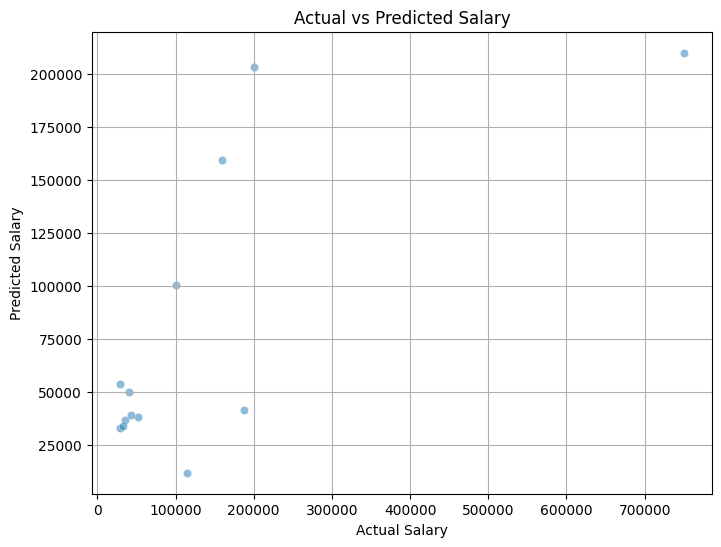

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()